# Desarrollo Tarea Metodos II MEF

Inicio montando el google drive y llamando al archivo de la Casen

In [1]:
from google.colab import drive # Importa el módulo para montar Google Drive
drive.mount('/content/drive')  # Monta el Drive para acceder a tus archivos

Mounted at /content/drive


Cargo librerias que probablemente usaré, las cuales son comunes en la ciencia de datos en python

In [2]:
import pandas as pd # Para manejo de dataframes
import numpy as np # Para funciones matemáticas y promedios ponderados
import matplotlib.pyplot as plt # Para generar gráficos
import seaborn as sns

Cargo la base de datos y verifico si quedo correctatmente cargada al ambiente de Python

In [3]:
ruta_csv = '/content/drive/MyDrive/R a Python Proy. MEF/Tarea Met II/Sol en Python Coolab/CASEN2013_convertida.csv'
df = pd.read_csv(ruta_csv, low_memory=False)  # Cargamos el CSV. "low_memory=False" evita advertencias por tipos de datos mezclados

In [4]:
df.head()

,folio,o,region,comuna,zona,pco1,sexo,edad,ecivil,h5l,...,facat_hacinamiento,facat_v1,facat_v3,facat_v5,facat_v7,facat_v23,facat_v24,facat_v25,facat_pobreza_multi,facat_pobreza_MN
0,11011001061,1,1,1101,1,1,2,36,4,NaN,...,"Sin hacinamiento (2,49 y menos)",Departamento en edificio con ascensor,Bueno,Bueno,Bueno,Red pública con medidor propio,Con llave dentro de la vivienda,"Sí, con WC conectado al alcantarillado",No pobre,No pobres
1,11011001061,2,1,1101,1,10,2,30,7,NaN,...,"Sin hacinamiento (2,49 y menos)",Departamento en edificio con ascensor,Bueno,Bueno,Bueno,Red pública con medidor propio,Con llave dentro de la vivienda,"Sí, con WC conectado al alcantarillado",No pobre,No pobres
2,11011001181,1,1,1101,1,1,1,41,1,1.0,...,"Sin hacinamiento (2,49 y menos)",Departamento en edificio con ascensor,Bueno,Bueno,Bueno,Red pública con medidor propio,Con llave dentro de la vivienda,"Sí, con WC conectado al alcantarillado",No pobre,No pobres
3,11011001181,2,1,1101,1,2,2,41,1,1.0,...,"Sin hacinamiento (2,49 y menos)",Departamento en edificio con ascensor,Bueno,Bueno,Bueno,Red pública con medidor propio,Con llave dentro de la vivienda,"Sí, con WC conectado al alcantarillado",No pobre,No pobres
4,11011001181,3,1,1101,1,3,2,10,7,NaN,...,"Sin hacinamiento (2,49 y menos)",Departamento en edificio con ascensor,Bueno,Bueno,Bueno,Red pública con medidor propio,Con llave dentro de la vivienda,"Sí, con WC conectado al alcantarillado",No pobre,No pobres


### Usando la CASEN 2013, cree un data.frame llamado “edadEscolaridad” con las siguientes variables: <br> "folio", "o", "pco1", "region", "sexo", "expr", "edad", "ESC".

Genero el data frame solicitado utilizando las cólumnas o variables indicadas en el primer enunciado

In [6]:
edadEscolaridad = df[['folio', 'o', 'pco1', 'region', 'sexo', 'expr', 'edad', 'ESC']]
edadEscolaridad.head()

,folio,o,pco1,region,sexo,expr,edad,ESC
0,11011001061,1,1,1,2,32,36,17.0
1,11011001061,2,10,1,2,32,30,17.0
2,11011001181,1,1,1,1,32,41,17.0
3,11011001181,2,2,1,2,32,41,15.0
4,11011001181,3,3,1,2,32,10,NaN


A continuación dejo el dicionario de datos de aquellas varialbes extraidas
- o = Numero de orden de la persona dentro del hogar.
- folio = Identificación del hogar.
- region = Región
    1. I: Tarapaca
    2. II: Antofagasta
    3. III: Atacama
    4. IV: Coquimbo
    5. V: Valparaíso
    6. VI: Libertador General Bernardo O'Higgins
    7. VII: Maule
    8. VIII: Bío Bío
    9. IX: La Araucanía
    10. X: Los Lagos
    11. XI: Aysén del General Carlos Ibáñez del Campo
    12. XII: Magallanes y de la Antírtica Chilena
    13. R.M.: Metropolitana de Santiago
    14. XIV: Los Ríos
    15. XV: Arica y Parinacota
- pco1 = Parentesco con el jefe de hogar
    1. Jefe(a) de hogar
    2. Esposo(a) o pareja
    3. Hijo(a) de ambos
    4. Hijo(a) sólo del jefe
    5. Hijo(a) sólo del esposo(a) o pareja
    6. Padre o madre
    7. Suegro(a)
    8. Yerno o nuera
    9. Nieto(a)
    10. Hermano(a)
    11. Cuñado(a)
    12. Otro familiar
    13. No familiar
    14. Servicio doméstico puertas adentro
- sexo
    1. hombre
    2. mujer
- expr = expanasión regional
- edad = edad
- ESC = escolaridad nivel de educación

**Análisis exploratorio** <br>
Determinare el promedio de la edad y la escolaridad de los jefes de hogar

In [8]:
print("Promedio sin remover NA:")
print(edadEscolaridad[edadEscolaridad['pco1'] == 1][['edad', 'ESC']].mean())
# Calcula la media simple de edad y escolaridad para los jefes de hogar

Promedio sin remover NA:
edad    52.797063
ESC      9.606913
dtype: float64


A pesar de que no indique que removiera los NA, Python igual los removio para poder determinar el promedio, pero podriamos habrelo indicado con el siguiente código

In [9]:
print("Promedio removiendo NA:")
print(edadEscolaridad[edadEscolaridad['pco1'] == 1][['edad', 'ESC']].mean(skipna=True))

Promedio removiendo NA:
edad    52.797063
ESC      9.606913
dtype: float64


Los resultados nos muestran que en el 2013 el promedio de edad de los jefes de hogar en chile era de 52 años y poseeian al rededor de 9 años de escolaridad, el cual para el sistema escoalar chileno seria educación basica completa.

Ahora determinaremos datos pero aperturado por región.

In [10]:
print("Edad promedio por región:")
print(edadEscolaridad.groupby('region')['edad'].mean())
# Agrupa por región y calcula promedio de edad

Edad promedio por región:
region
1     31.928860
2     31.851729
3     33.888279
4     34.711604
5     36.647171
6     35.543577
7     36.897147
8     36.236277
9     36.065803
10    36.724785
11    34.761364
12    36.704165
13    35.017394
14    37.238157
15    32.926782
Name: edad, dtype: float64


In [14]:
# Igual que arriba pero ignorando NA en ESC
print("Escolaridad promedio por región (con NA):")
print(edadEscolaridad.groupby('region')['ESC'].mean())
# Por defecto, .mean() en pandas ignora los NA automáticamente)

Escolaridad promedio por región (con NA):
region
1     10.995247
2     11.281495
3     10.563376
4     10.253363
5     10.779830
6      9.801758
7      9.188465
8      9.967137
9      9.622209
10     9.307767
11     9.778033
12    11.030174
13    11.190112
14     9.643455
15    10.948714
Name: ESC, dtype: float64


Agruparemos por sexo y región, y cálcularemos promedio de escolaridad

In [16]:
prom_ESC_region_sexo = edadEscolaridad.groupby(['sexo', 'region'])['ESC'].mean()
print("Promedio de escolaridad por sexo y región:")
print(prom_ESC_region_sexo)
# Genera tabla anidada similar a tapply con dos factores

Promedio de escolaridad por sexo y región:
sexo  region
1     1         11.140074
      2         11.457966
      3         10.778905
      4         10.315720
      5         10.906584
      6          9.788954
      7          9.077891
      8         10.052477
      9          9.651134
      10         9.457055
      11         9.848644
      12        11.201417
      13        11.387773
      14         9.720909
      15        11.117021
2     1         10.864704
      2         11.117684
      3         10.362893
      4         10.199131
      5         10.670936
      6          9.813392
      7          9.286710
      8          9.893388
      9          9.596916
      10         9.174429
      11         9.712389
      12        10.872088
      13        11.020277
      14         9.573845
      15        10.803123
Name: ESC, dtype: float64


Ahora nos gustaria determinar que regiones poseen la mayor brecha en su nivel de escolaridad

In [19]:
prom_ESC_region_sexo = prom_ESC_region_sexo.reset_index()
# Asegura que 'sexo' y 'region' estén como columnas, no como índice
tabla_pivot = prom_ESC_region_sexo.pivot(index='sexo', columns='region', values='ESC')
# Genera tabla ancha (formato de matriz)
print("Tabla de escolaridad promedio por sexo y región:")
print(tabla_pivot)

Tabla de escolaridad promedio por sexo y región:
region         1          2          3          4          5         6   \
sexo                                                                      
1       11.140074  11.457966  10.778905  10.315720  10.906584  9.788954   
2       10.864704  11.117684  10.362893  10.199131  10.670936  9.813392   

region        7          8         9         10        11         12  \
sexo                                                                   
1       9.077891  10.052477  9.651134  9.457055  9.848644  11.201417   
2       9.286710   9.893388  9.596916  9.174429  9.712389  10.872088   

region         13        14         15  
sexo                                    
1       11.387773  9.720909  11.117021  
2       11.020277  9.573845  10.803123  


In [23]:
# Calcula diferencia absoluta entre hombres y mujeres por región
brechas = abs(tabla_pivot.loc[1] - tabla_pivot.loc[2])  # loc[1] = hombres, loc[2] = mujeres
# el .loc en Pandas busca el valor indicado en alguna fila del data frame
# en caso de querer buscar la posición de una file en especifico se utiliza el iloc
print("Brechas en escolaridad promedio por región:")
print(brechas)

Brechas en escolaridad promedio por región:
region
1     0.275370
2     0.340282
3     0.416012
4     0.116589
5     0.235648
6     0.024439
7     0.208819
8     0.159089
9     0.054217
10    0.282626
11    0.136254
12    0.329328
13    0.367497
14    0.147064
15    0.313898
dtype: float64


In [22]:
# Encuentra región con mayor diferencia absoluta
region_brecha_max = brechas.idxmax()  # Retorna el índice (región) con la mayor brecha
print(f"Región con mayor brecha de escolaridad entre sexos: Región {region_brecha_max}")

Región con mayor brecha de escolaridad entre sexos: Región 3


Ahora utilizaremos la columna que nos permite determinar datos expandidos para hacer algunos cálculos, esta vez si nos enfocaremos solo en los jefes de hogar.

In [24]:
# Filtra solo las observaciones de jefes de hogar
jefes = edadEscolaridad[edadEscolaridad['pco1'] == 1]
print("Promedio de edad de jefes de hogar:")
print(jefes['edad'].mean()) #Solo para validar que esté bien generada la variable jefes

Promedio de edad de jefes de hogar:
52.79706257025103


In [45]:
# Define función para calcular promedio ponderado de una variable por región
def promedio_ponderado_por_region(variable):
    # Calcula el promedio ponderado por región usando expr como peso
    return jefes.dropna(subset=[variable]).groupby('region').apply(
        lambda g: np.average(g[variable], weights=g['expr'])
    )

# Crea un DataFrame con edad y escolaridad promedio ponderada por región
edadYEscPorRegExp = pd.DataFrame({
    'edad': promedio_ponderado_por_region('edad'),
    'ESC': promedio_ponderado_por_region('ESC')
})
print("Edad y escolaridad promedio ponderada por región:")
print(edadYEscPorRegExp)

Edad y escolaridad promedio ponderada por región:
             edad        ESC
region                      
1       49.079486  10.907801
2       48.610906  11.395684
3       50.956132   9.942783
4       52.941960   9.718694
5       53.471055  10.740477
6       51.993865   9.433958
7       53.682869   8.294571
8       53.702665   9.343049
9       53.343608   8.951130
10      52.870644   8.926648
11      50.788261   9.303072
12      52.526043  10.573716
13      51.842113  11.239140
14      55.369002   8.817700
15      51.184790  10.429524


<ipython-input-45-e2102b9b22d6>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return jefes.dropna(subset=[variable]).groupby('region').apply(
<ipython-input-45-e2102b9b22d6>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return jefes.dropna(subset=[variable]).groupby('region').apply(


Graficamos

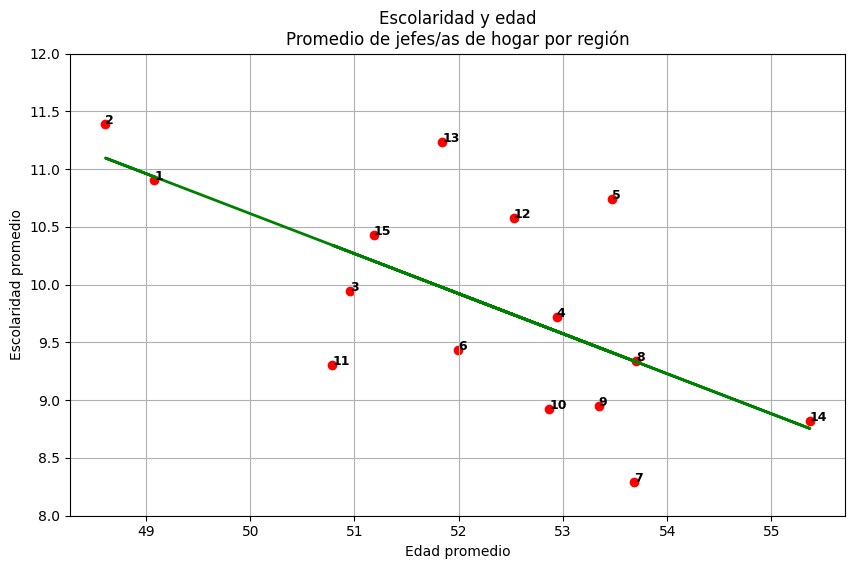

In [46]:
plt.figure(figsize=(10, 6))  # Define el tamaño del gráfico (ancho x alto)

# Dibuja los puntos (scatter plot) con color rojo
plt.scatter(edadYEscPorRegExp['edad'], edadYEscPorRegExp['ESC'], color='red')

# Agrega etiquetas de número de región a cada punto
for region in edadYEscPorRegExp.index:
    plt.annotate(str(region),
                 (edadYEscPorRegExp['edad'][region], edadYEscPorRegExp['ESC'][region]),
                 fontsize=9, fontweight='bold')

# Define título y etiquetas de ejes
plt.title("Escolaridad y edad\nPromedio de jefes/as de hogar por región")
plt.xlabel("Edad promedio")
plt.ylabel("Escolaridad promedio")
plt.ylim(8, 12)  # Establece límites para el eje Y

# Agrega línea de regresión (tendencia lineal)
modelo = np.polyfit(edadYEscPorRegExp['edad'], edadYEscPorRegExp['ESC'], 1)  # Ajuste lineal (pendiente y ordenada)
plt.plot(edadYEscPorRegExp['edad'], np.polyval(modelo, edadYEscPorRegExp['edad']), color='green', linewidth=2)  # Dibuja la línea

# Activa la grilla
plt.grid(True)

# Muestra el gráfico completo
plt.show()




---



In [48]:
!pip install scipy matplotlib seaborn

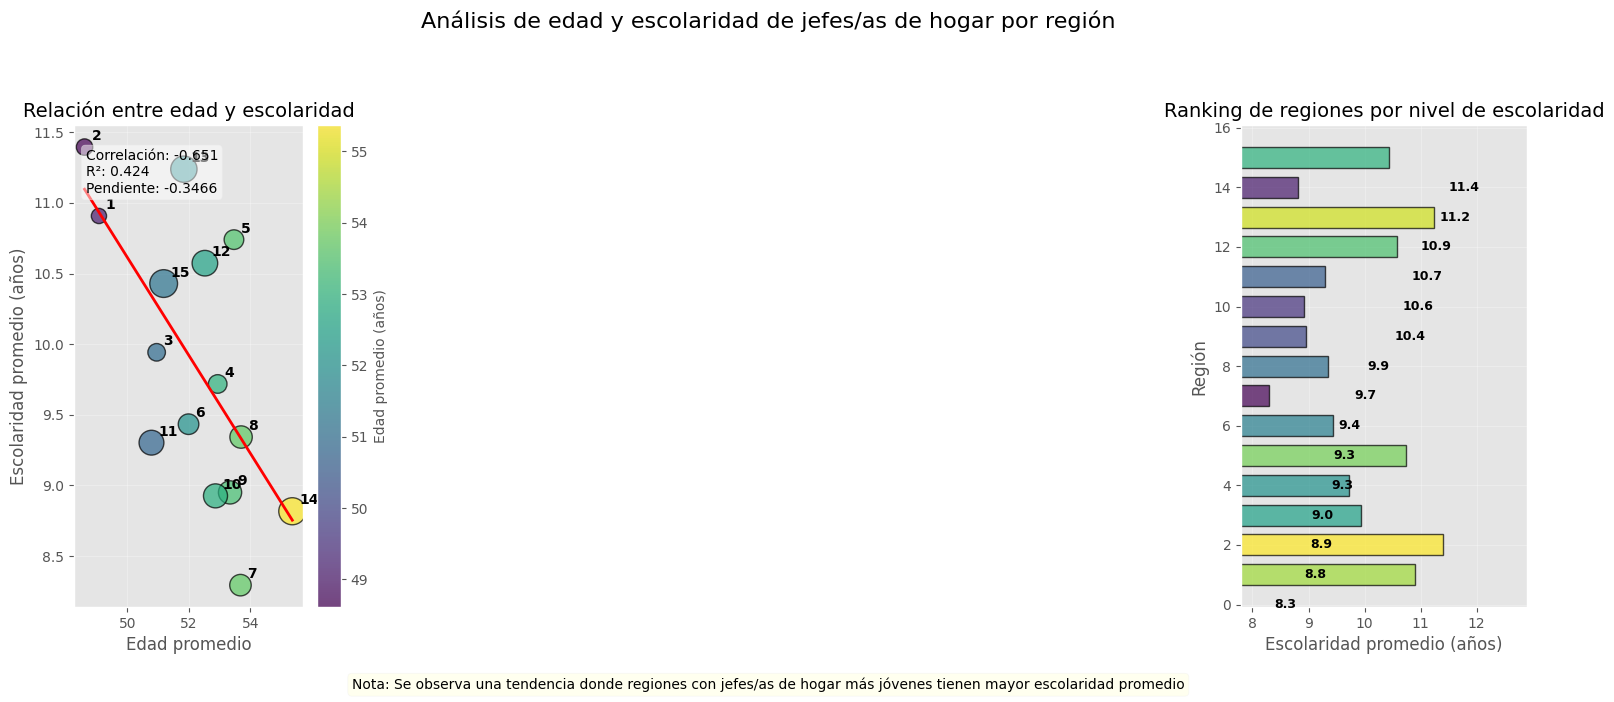

In [50]:
# Configuramos un estilo más moderno para el gráfico
# En lugar de usar seaborn, usamos un estilo predeterminado de matplotlib
plt.style.use('ggplot')  # Alternativa a seaborn que viene con matplotlib

# Creamos una figura más grande para acomodar dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Análisis de edad y escolaridad de jefes/as de hogar por región', fontsize=16)

# PRIMER GRÁFICO: Scatter plot mejorado con tamaño variable según la región
# Suponiendo que tenemos una columna adicional con la población por región
# Si no la tienes, podemos simularla para el ejemplo
# población_por_region = edadYEscPorRegExp.index * 100000 + 500000  # Simulada

# Color map para colorear según edad
colors = edadYEscPorRegExp['edad']
sizes = edadYEscPorRegExp.index * 20 + 100  # Tamaño variable para cada punto (simulado)

scatter = ax1.scatter(
    edadYEscPorRegExp['edad'],
    edadYEscPorRegExp['ESC'],
    c=colors,
    s=sizes,
    cmap='viridis',
    alpha=0.7,
    edgecolors='black',
    linewidths=1
)

# Añadimos etiquetas de región
for region in edadYEscPorRegExp.index:
    ax1.annotate(
        str(region),
        (edadYEscPorRegExp['edad'][region], edadYEscPorRegExp['ESC'][region]),
        fontsize=10,
        fontweight='bold',
        xytext=(5, 5),
        textcoords='offset points'
    )

# Añadimos línea de regresión usando numpy directamente
# Cálculo de la regresión usando numpy
x = edadYEscPorRegExp['edad'].values
y = edadYEscPorRegExp['ESC'].values

# Calculamos la regresión lineal con numpy.polyfit
modelo = np.polyfit(x, y, 1)
slope = modelo[0]
intercept = modelo[1]

# Calculamos el coeficiente de correlación manualmente
x_mean = np.mean(x)
y_mean = np.mean(y)
r_num = np.sum((x - x_mean) * (y - y_mean))
r_den = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
r_value = r_num / r_den if r_den != 0 else 0

# Línea de regresión
x_reg = np.linspace(min(x), max(x), 100)
y_reg = slope * x_reg + intercept
ax1.plot(x_reg, y_reg, color='red', linestyle='-', linewidth=2)

# Añadimos leyenda con info estadística
stats_text = (
    f'Correlación: {r_value:.3f}\n'
    f'R²: {r_value**2:.3f}\n'
    f'Pendiente: {slope:.4f}'
)
ax1.text(
    0.05, 0.95, stats_text,
    transform=ax1.transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)

# Configuración del primer gráfico
ax1.set_title('Relación entre edad y escolaridad', fontsize=14)
ax1.set_xlabel('Edad promedio', fontsize=12)
ax1.set_ylabel('Escolaridad promedio (años)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Añadimos colorbar para mostrar la escala de edades
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Edad promedio (años)', fontsize=10)

# SEGUNDO GRÁFICO: Gráfico de barras horizontales ordenado
# Ordenamos los datos por escolaridad
sorted_data = edadYEscPorRegExp.sort_values('ESC', ascending=True)

# Creamos barras para escolaridad
bars = ax2.barh(
    y=sorted_data.index,
    width=sorted_data['ESC'],
    height=0.7,
    color=plt.cm.viridis(np.linspace(0, 1, len(sorted_data))),
    alpha=0.7,
    edgecolor='black',
    linewidth=1
)

# Añadimos etiquetas de valor al final de cada barra
for i, (idx, row) in enumerate(sorted_data.iterrows()):
    ax2.text(
        row['ESC'] + 0.1,
        i,
        f"{row['ESC']:.1f}",
        va='center',
        fontsize=9,
        fontweight='bold'
    )
    # Añadimos la edad como texto al inicio de cada barra
    ax2.text(
        0.1,
        i,
        f"Edad: {row['edad']:.1f}",
        va='center',
        fontsize=8,
        color='white',
        fontweight='bold'
    )

# Configuración del segundo gráfico
ax2.set_title('Ranking de regiones por nivel de escolaridad', fontsize=14)
ax2.set_xlabel('Escolaridad promedio (años)', fontsize=12)
ax2.set_ylabel('Región', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(sorted_data['ESC'].min() - 0.5, sorted_data['ESC'].max() + 1.5)

# Ajustamos el diseño para que los gráficos no se superpongan
plt.tight_layout(pad=3)

# Añadimos una nota explicativa del análisis
fig.text(
    0.5, 0.01,
    'Nota: Se observa una tendencia donde regiones con jefes/as de hogar más jóvenes tienen mayor escolaridad promedio',
    fontsize=10,
    ha='center',
    bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5)
)

# Mostramos el gráfico
plt.show()